In [3]:
from helpers import *
from models import MultiLayerPerceptron, HebbianMultiLayerPerceptron, KolenPollackMultiLayerPerceptron, FeedbackAlignmentMultiLayerPerceptron
from optimizers import BasicOptimizer
import numpy as np
import torch

In [7]:
train_set, valid_set, test_set = download_mnist()

Number of examples retained:
  24001 (training)
  5999 (validation)
  5000 (test)


In [5]:
# Model
NUM_INPUTS = np.product(train_set.dataset.data[0].shape) # size of an MNIST image
NUM_OUTPUTS = 10 # number of MNIST classes
NUM_HIDDEN = 100
ACTIVATION = "sigmoid" # output constrained between 0 and 1
BIAS = False
LR = 0.01
HEBB_LR = 1e-4
FA_LR = 1e-3  # Feedback Alignment typically needs a lower learning rate
KP_LR = 1e-3  # Kolen-Pollack might also benefit from a lower learning rate
NUM_EPOCHS = 5

# Dataloaders
BATCH_SIZE = 32

train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_set, batch_size=BATCH_SIZE, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=False)

Computing SNR for Backprop...
Computing SNR for Hebbian...
Computing SNR for KolenPollack...
Computing SNR for FeedbackAlignment...


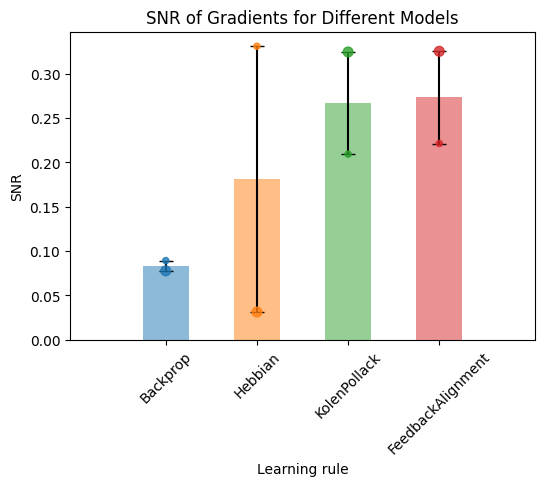

Computing Cosine Similarity for Backprop...


100%|██████████| 10/10 [02:31<00:00, 15.10s/it]


Computing Cosine Similarity for Hebbian...


100%|██████████| 10/10 [02:35<00:00, 15.51s/it]


Computing Cosine Similarity for KolenPollack...


100%|██████████| 10/10 [02:43<00:00, 16.34s/it]


Computing Cosine Similarity for FeedbackAlignment...


100%|██████████| 10/10 [02:36<00:00, 15.64s/it]


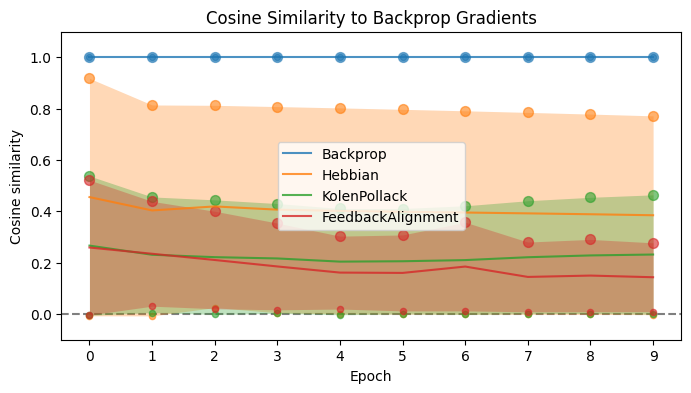

In [6]:
NUM_EPOCHS = 10
BATCH_SIZE = 32
NUM_HIDDEN = 100
ACTIVATION = "sigmoid"
BIAS = False
LR = 0.01
FA_LR = 1e-3  # Feedback Alignment typically needs a lower learning rate
KP_LR = 1e-3  # Kolen-Pollack might also benefit from a lower learning rate

# Prepare dataloaders
train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_set, batch_size=BATCH_SIZE, shuffle=False)

# Initialize and train models
models = {
    "Backprop": MultiLayerPerceptron(num_inputs=NUM_INPUTS, num_hidden=NUM_HIDDEN, num_outputs=NUM_OUTPUTS, activation_type=ACTIVATION, bias=BIAS),
    "Hebbian": HebbianMultiLayerPerceptron(num_inputs=NUM_INPUTS, num_hidden=NUM_HIDDEN, num_outputs=NUM_OUTPUTS, activation_type=ACTIVATION, bias=BIAS, clamp_output=True),
    "KolenPollack": KolenPollackMultiLayerPerceptron(num_inputs=NUM_INPUTS, num_hidden=NUM_HIDDEN, num_outputs=NUM_OUTPUTS, activation_type=ACTIVATION, bias=BIAS),
    "FeedbackAlignment": FeedbackAlignmentMultiLayerPerceptron(num_inputs=NUM_INPUTS, num_hidden=NUM_HIDDEN, num_outputs=NUM_OUTPUTS, activation_type=ACTIVATION, bias=BIAS),
}

'''results_dict = {}

for model_name, model in models.items():
    print(f"Training {model_name} model...")
    if model_name == "Hebbian":
        optimizer = BasicOptimizer(model.parameters(), lr=HEBB_LR)
    elif model_name == "FeedbackAlignment":
        optimizer = BasicOptimizer(model.parameters(), lr=FA_LR)
    elif model_name == "KolenPollack":
        optimizer = KolenPollackOptimizer(model.parameters(), lr=KP_LR)
    else:
        optimizer = BasicOptimizer(model.parameters(), lr=LR)

    results_dict[model_name] = train_model(model, train_loader, valid_loader, optimizer, num_epochs=NUM_EPOCHS)

# Visualize learning curves
fig, ax = plt.subplots(figsize=(10, 6))
for model_name, results in results_dict.items():
    plot_results(results, ax=ax)
ax.legend([f"{name} (train)" for name in results_dict.keys()] +
          [f"{name} (valid)" for name in results_dict.keys()])
plt.title("Learning Curves for Different Models")
plt.tight_layout()
plt.show()

# Plot final accuracies per class
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
for (model_name, results), ax in zip(results_dict.items(), axes.flatten()):
    plot_scores_per_class(results, ax=ax)
    ax.set_title(f"{model_name} - Accuracy per Class")
plt.tight_layout()
plt.show()'''

# Compute and visualize SNR
SNR_dict = {}
for model_name, model in models.items():
    print(f"Computing SNR for {model_name}...")
    model_SNR_dict = compute_gradient_SNR(model, valid_loader.dataset)
    SNR_dict[model_name] = [SNR for SNR in model_SNR_dict.values()]

plot_gradient_SNRs(SNR_dict)
plt.title("SNR of Gradients for Different Models")
plt.show()

# Compute and visualize Cosine Similarity
cosine_sim_dict = {}
for model_name, model in models.items():
    print(f"Computing Cosine Similarity for {model_name}...")
    if model_name == "Hebbian":
        optimizer = BasicOptimizer(model.parameters(), lr=HEBB_LR)
    elif model_name == "FeedbackAlignment":
        optimizer = BasicOptimizer(model.parameters(), lr=FA_LR)
    elif model_name == "KolenPollack":
        optimizer = KolenPollackOptimizer(model.parameters(), lr=KP_LR)
    else:
        optimizer = BasicOptimizer(model.parameters(), lr=LR)

    model_cosine_sim_dict = train_and_calculate_cosine_sim(model, train_loader, valid_loader, optimizer, num_epochs=NUM_EPOCHS)
    cosine_sim_dict[model_name] = [cos_sim for cos_sim in model_cosine_sim_dict.values()]



plot_gradient_cosine_sims(cosine_sim_dict)
plt.title("Cosine Similarity to Backprop Gradients")
plt.show()